# Linear System


## Discription


The studied Duffing system follows:

$$
\begin{equation}
    \ddot{x} = - p \hat{x} - d \hat{\dot{x}},
\end{equation}
$$

where $\hat{x}$ and $\hat{\dot{x}}$ refers to delayed(sampled) displacement and velocity.


## Import Functions and `.ode` Files

In [1]:
import numpy as np
import pyxpp.pyxpp as pyxpp
import matplotlib.pyplot as plt
import sys
import os

sys.path.insert(0,os.path.abspath(".."))
from utils import *

plt.rcParams["font.serif"] = ["Times New Roman"]

ODE_Sampling = "LinearSampling.ode"
ODE_Order0 = "ConstantDelay.ode"
ODE_Order1 = "ApproxSys/LinearApproxOrder1.ode"
ODE_Order3 = "ApproxSys/LinearApproxOrder3.ode"
ODE_Order20 = "ApproxSys/LinearApproxOrder20.ode"

## Simulation with `XPPaut`

In [2]:
SamplingTime = 0.31
SimulationTime = 20
Data_Sampling = pyxpp.run(ODE_Sampling, ts=SamplingTime, total=SimulationTime)
Data_Order0 = pyxpp.run(ODE_Order0, ts=1.5 * SamplingTime, total=SimulationTime)
Data_Order1 = pyxpp.run(ODE_Order1, ts=SamplingTime, total=SimulationTime)
Data_Order3 = pyxpp.run(ODE_Order3, ts=SamplingTime, total=SimulationTime)
Data_Order20 = pyxpp.run(ODE_Order20, ts=SamplingTime, total=SimulationTime)

Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \
Illegal character \


## Visualization

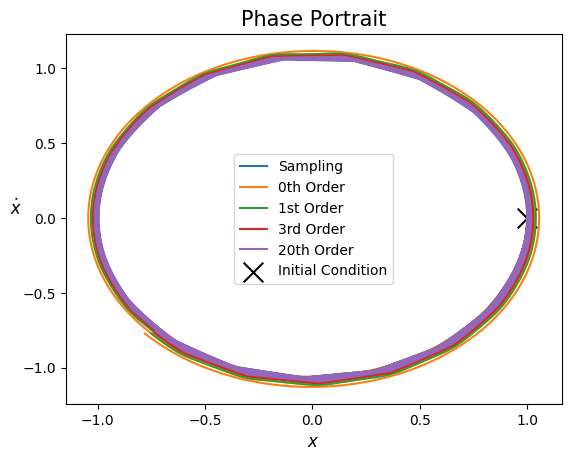

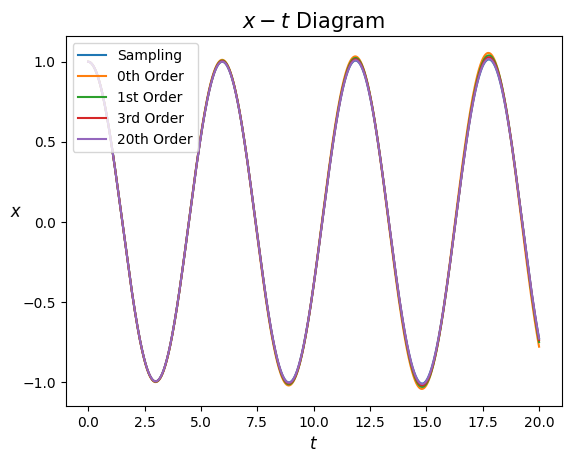

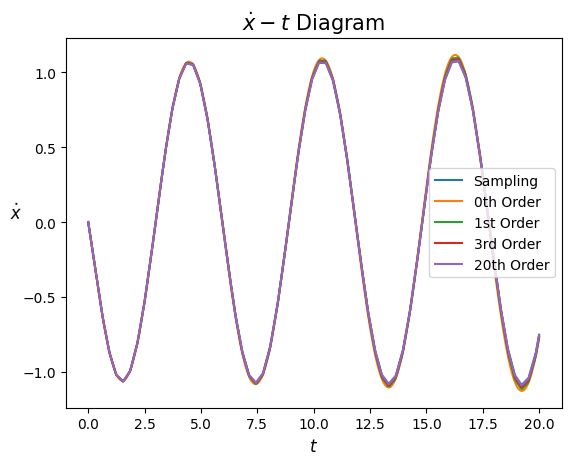

In [3]:
plt.plot(Data_Sampling[:, 1], Data_Sampling[:, 2], label="Sampling")
plt.plot(Data_Order0[:, 1], Data_Order0[:, 2], label="0th Order")
plt.plot(Data_Order1[:, 1], Data_Order1[:, 2], label="1st Order")
plt.plot(Data_Order3[:, 1], Data_Order3[:, 2], label="3rd Order")
plt.plot(Data_Order20[:, 1], Data_Order20[:, 2], label="20th Order")
plt.scatter(1, 0, c="black", marker="x", s=200, label="Initial Condition")
plt.xlabel(r"$x$", fontsize=12)
plt.ylabel(r"$\dot{x}$", fontsize=12, rotation=np.pi / 2)
plt.title("Phase Portrait", fontsize=15)
plt.legend()
plt.show()

plt.plot(Data_Sampling[:, 0], Data_Sampling[:, 1], label="Sampling")
plt.plot(Data_Order0[:, 0], Data_Order0[:, 1], label="0th Order")
plt.plot(Data_Order1[:, 0], Data_Order1[:, 1], label="1st Order")
plt.plot(Data_Order3[:, 0], Data_Order3[:, 1], label="3rd Order")
plt.plot(Data_Order20[:, 0], Data_Order20[:, 1], label="20th Order")
plt.xlabel(r"$t$", fontsize=12)
plt.ylabel(r"$x$", fontsize=12, rotation=np.pi / 2)
plt.title(r"$x-t$ Diagram", fontsize=15)
plt.legend()
plt.show()

plt.plot(Data_Sampling[:, 0], Data_Sampling[:, 2], label="Sampling")
plt.plot(Data_Order0[:, 0], Data_Order0[:, 2], label="0th Order")
plt.plot(Data_Order1[:, 0], Data_Order1[:, 2], label="1st Order")
plt.plot(Data_Order3[:, 0], Data_Order3[:, 2], label="3rd Order")
plt.plot(Data_Order20[:, 0], Data_Order20[:, 2], label="20th Order")
plt.xlabel(r"$t$", fontsize=12)
plt.ylabel(r"$\dot{x}$", fontsize=12, rotation=np.pi / 2)
plt.title(r"$\dot{x}-t$ Diagram", fontsize=15)
plt.legend()
plt.show()

## Error

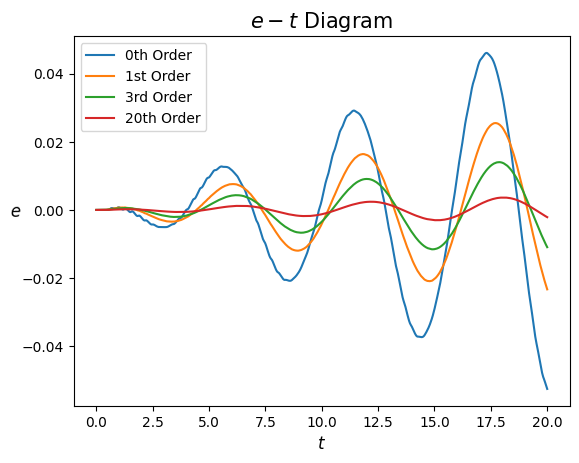

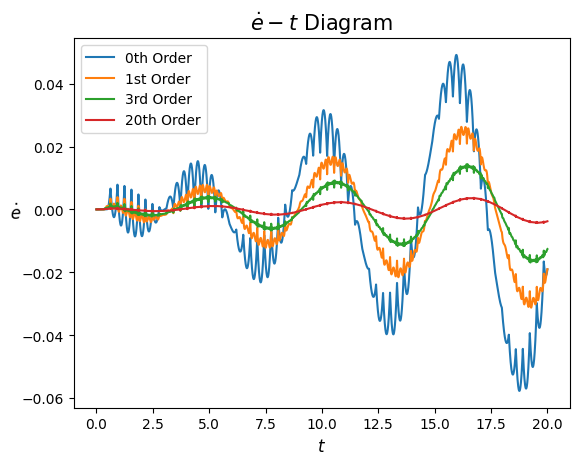

In [4]:
plt.plot(Data_Sampling[:, 0], Data_Order0[:, 1] - Data_Sampling[:, 1], label="0th Order")
plt.plot(Data_Sampling[:, 0], Data_Order1[:, 1] - Data_Sampling[:, 1], label="1st Order")
plt.plot(Data_Sampling[:, 0], Data_Order3[:, 1] - Data_Sampling[:, 1], label="3rd Order")
plt.plot(
    Data_Sampling[:, 0], Data_Order20[:, 1] - Data_Sampling[:, 1], label="20th Order"
)
plt.title(r"$e-t$ Diagram", fontsize=15)
plt.xlabel(r"$t$", fontsize=12)
plt.ylabel(r"$e$", fontsize=12, rotation=np.pi / 2)
plt.legend()
plt.show()

plt.plot(Data_Sampling[:, 0], Data_Order0[:, 2] - Data_Sampling[:, 2], label="0th Order")
plt.plot(Data_Sampling[:, 0], Data_Order1[:, 2] - Data_Sampling[:, 2], label="1st Order")
plt.plot(Data_Sampling[:, 0], Data_Order3[:, 2] - Data_Sampling[:, 2], label="3rd Order")
plt.plot(
    Data_Sampling[:, 0], Data_Order20[:, 2] - Data_Sampling[:, 2], label="20th Order"
)
plt.title(r"$\dot{e}-t$ Diagram", fontsize=15)
plt.xlabel(r"$t$", fontsize=12)
plt.ylabel(r"$\dot{e}$", fontsize=12, rotation=np.pi / 2)
plt.legend()
plt.show()

## 4. Comparasion of MMS

Find peaks

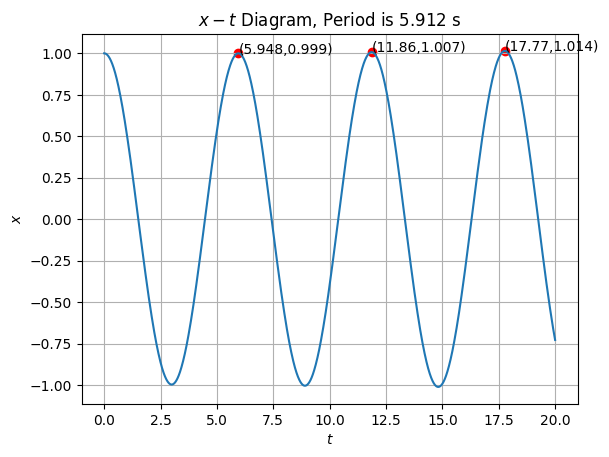

In [5]:
from scipy.signal import find_peaks

PeakTime_id, _ = find_peaks(Data_Sampling[:, 1], distance=100)

ResponsePeriod = Data_Sampling[PeakTime_id, 0][1] - Data_Sampling[PeakTime_id, 0][0]

plt.plot(Data_Sampling[:, 0], Data_Sampling[:, 1])
plt.scatter(Data_Sampling[PeakTime_id, 0], Data_Sampling[PeakTime_id, 1], c="r")

for i in PeakTime_id:
    plt.annotate(
        f"({str(Data_Sampling[i, 0])[:5]},{str(Data_Sampling[i, 1])[:5]})",
        (Data_Sampling[i, 0], Data_Sampling[i, 1]),
    )
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
plt.grid()
# Display first 5 digits
plt.title(r"$x-t$" + " Diagram, Period is " + str(ResponsePeriod)[:5] + " s")

plt.show()

MMS gives a solution at $T_{0} = \tau = \frac{2 \pi}{t_{s}} $ time scale:

$$
Y_{0} = A_{0} (T_{1}, T_{2}) \cos{\left( \frac{2 k}{3} T_{0} \right)} + B_{0} (T_{1}, T_{2}) \sin{\left( \frac{2 k}{3} T_{0} \right)},
$$

where $k$ is any positive integer, indicating that the period should be

$$
\frac{2 \pi}{\frac{2 k}{3} T_{0}} = \frac{2 \pi}{\frac{2 k}{3} \frac{2 \pi}{t_{s}}} = \frac{3 t_{s}}{2 k}.
$$


In [6]:
ResponsePeriod * 2 / (3 * SamplingTime)

12.714408172043013